## Discretization
Data discretization is a preprocessing technique used to transform continous or numerical data into discrete categories or bins. This process can be particulary useful for machine learning alogirthms that handle categorical data more effectively than continous data. it can also help to improve model interpretability and handle outliers more robuslty.

In [36]:
# import libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [37]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [39]:
#drop deck colums
df.drop('deck', axis=1, inplace=True)

In [40]:
#impute missing values
df['age'] = df['age'].fillna(df['age'].median())
df.isnull().sum().sort_values(ascending=False)


embarked       2
embark_town    2
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

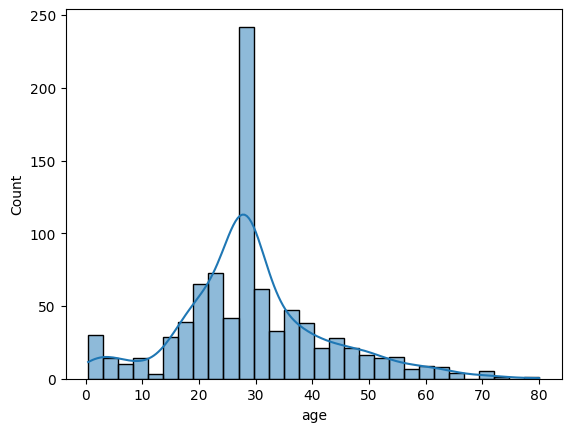

In [41]:
sns.histplot(df['age'], kde=True)

In [47]:
age_discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
df['ag_dis'] = age_discretizer.fit_transform(df[['age']])
df.head()

c:\Users\Muhammad Zeeshan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,ag_dis
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0.0


In [48]:
df['ag_dis'].sort_values()

0      0.0
557    0.0
558    0.0
559    0.0
560    0.0
      ... 
299    1.0
132    1.0
129    1.0
150    1.0
645    1.0
Name: ag_dis, Length: 891, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

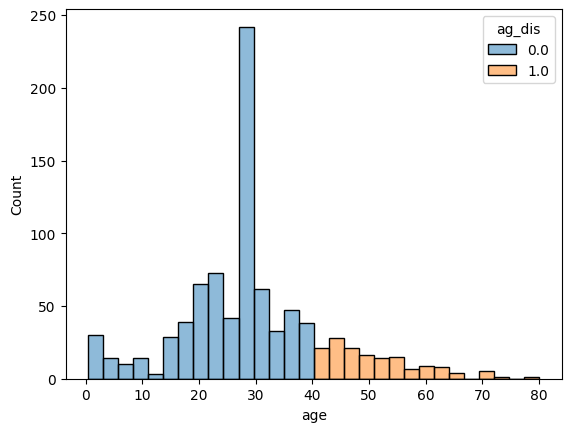

In [52]:
sns.histplot(df, x='age', hue='ag_dis')

<Axes: xlabel='age', ylabel='Count'>

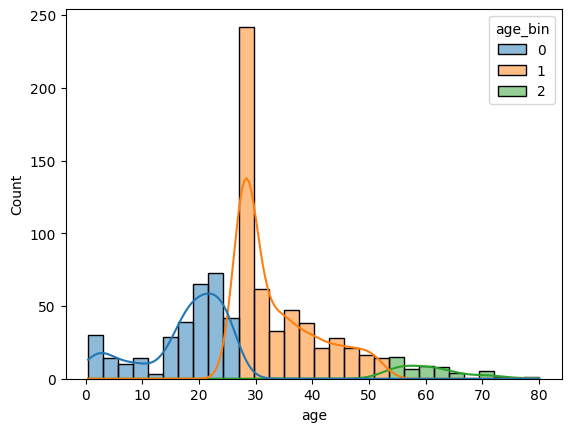

In [51]:
#pandas method for manual binning
df['age_bin'] = pd.cut(df['age'], bins=3, labels=[0,1,2])
sns.histplot(df, x='age', hue='age_bin')

<Axes: xlabel='age', ylabel='Count'>

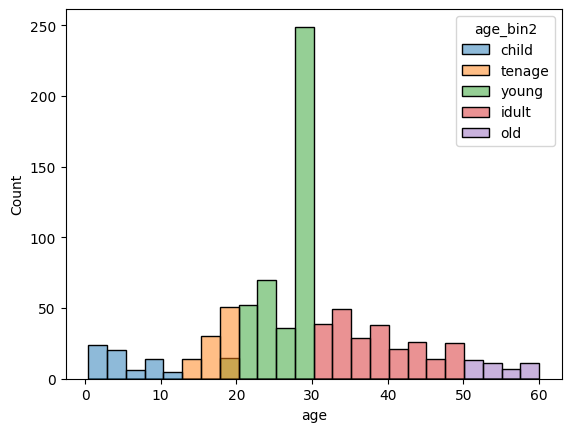

In [55]:
# define the bins
bins = [0,12, 19, 30, 50, 60]
labels = ['child', 'tenage', 'young','idult' ,'old']
df['age_bin2'] = pd.cut(df['age'], bins= bins, labels = labels)
sns.histplot(df, x='age', hue='age_bin2')